# Mini-Project 1 : Machine Learning For Mental Health

**Instructions:**

Using the Mental Health dataset and what you have learn this week, answer the following questions :

What is the distribution of mental health conditions among different age groups in the tech industry?
How does the frequency of mental health issues vary by gender?
Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

## General information about the dataset

In [30]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mental_health = pd.read_csv('survey.csv')

pd.set_option('display.max_columns', None)
mental_health.info()
mental_health.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,No,Yes,Yes,Not sure,No,Don't know,Don't know,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,Yes,Yes,No,No,No,No,No,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,Yes,Yes,No,Yes,No,No,Yes,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,No,Yes,Yes,Yes,No,No,No,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,No,Yes,Don't know,No,Don't know,Don't know,Don't know,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


<div style="border:solid green 2px; padding: 20px">
    This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. 
    It contains 27 columns and 1259 rows. Only column "Age" has an integer type, the rest are object.
    
   
   **This dataset contains the following data:**

- Timestamp

- Age

- Gender

- Country

- state: If you live in the United States, which state or territory do you live in?

- self_employed: Are you self-employed?

- family_history: Do you have a family history of mental illness?

- treatment: Have you sought treatment for a mental health condition?

- work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

- no_employees: How many employees does your company or organization have?

- remote_work: Do you work remotely (outside of an office) at least 50% of the time?

- tech_company: Is your employer primarily a tech company/organization?

- benefits: Does your employer provide mental health benefits?

- care_options: Do you know the options for mental health care your employer provides?

- wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

- seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

- anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

- leave: How easy is it for you to take medical leave for a mental health condition?

- mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

- phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

- coworkers: Would you be willing to discuss a mental health issue with your coworkers?

- supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

- mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

- phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

- mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

- obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

- comments: Any additional notes or comments

In [3]:
print(mental_health['Gender'].value_counts())
print('-----')
print(mental_health['Country'].value_counts())
print('-----')
print(mental_health['self_employed'].value_counts())
print('-----')
print(mental_health['family_history'].value_counts())
print('-----')
print(mental_health['work_interfere'].value_counts())
print('-----')
print(mental_health['benefits'].value_counts())
print('-----')
print(mental_health['care_options'].value_counts())
print('-----')
print(mental_health['leave'].value_counts())
print('-----')
print(mental_health['coworkers'].value_counts())
print('-----')
print(mental_health['phys_health_interview'].value_counts())
print('-----')
print(mental_health['mental_vs_physical'].value_counts())

Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter                      

In [4]:
print(mental_health['Age'].describe())
print('-----')
mental_health['Age'].value_counts()

count    1.259000e+03
mean     7.942815e+07
std      2.818299e+09
min     -1.726000e+03
25%      2.700000e+01
50%      3.100000e+01
75%      3.600000e+01
max      1.000000e+11
Name: Age, dtype: float64
-----


 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 40             33
 39             33
 43             28
 22             21
 41             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 48              6
 50              6
 20              6
 51              5
 49              4
 56              4
 57              3
 54              3
 55              3
 47              2
 60              2
 99999999999     1
 5               1
-1               1
 11              1
 8               1
 61              1
 53              1
-29              1
-1726            1
 65              1
 62              1
 58              1
 329             1
 72         

In [5]:
# the number of missing values in each column
mental_health.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [6]:
# checking for duplicate strings
mental_health.duplicated().sum()

0

In [7]:
# determining the percentage of missing values in each column
pd.DataFrame(round(mental_health.isna().mean().sort_values(ascending=False)*100,1)).style.background_gradient('coolwarm')

,0
comments,87.000000
state,40.900000
work_interfere,21.000000
self_employed,1.400000
seek_help,0.000000
obs_consequence,0.000000
mental_vs_physical,0.000000
phys_health_interview,0.000000
mental_health_interview,0.000000
supervisor,0.000000


<div style="border:solid green 2px; padding: 20px">
   
- In the "gender" column there are several spellings of "male", "female", different case of the first letters, typos and different meanings. All spellings should be reduced to a single form.
    
- The majority of the survey participants are from the USA (751 people), the UK is in second place - 185 people, Canada is in third place - 72 people. There are a large number of countries with 1-2 survey participants each.
    
- The majority of the respondents (1095 people) are not self-employed.
    
- 767 respondents have no family history of mental illness, while 492 have.
    
- The most missing values are in the "comment" column - 87%. This column is not important for our analysis, we can delete it. In the "state" column, 40.9% of the passes are exactly the number of survey participants from other countries. To save statistics on US states, we can fill in the missing values in this column with another text value, for example, "no". There are 20.1% missing values in the "work_interfere" column, that is, the respondent did not answer this question. The missing values can be replaced with a text value. There are only 1.4% missing values in the "self_employed" column. At the same time, most of the respondents (1095) are not self-employed, so instead of missing values, you can insert the answer "no", this will not distort the results.
    
- There are a lot of outliers in the "age" column (incorrectly entered data) - from -1726 to 999 999 99999. At the same time, the median value is 31 years old, the first quartile is 27 years old, and the third quartile is 36 years old. There are only 9 such abnormal values. Therefore, we can delete rows with abnormal values.
    
- There are no duplicates in the dataset.
    
- The column "timestamp" is of the "object" type and has information about the time of the survey, which is not important information in this study. Therefore, this column can be converted to the datetime type with only the date specified.

## Data preprocessing

In [15]:
# converting a column type to a date
mental_health['Timestamp'] = pd.to_datetime(mental_health['Timestamp']).dt.date
mental_health['Timestamp'] = mental_health.rename(columns={'Timestamp': 'Date'}, inplace=True).dt.date
mental_health['Date'] = pd.to_datetime(mental_health['Date'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       1259 non-null   datetime64[ns]
 1   Age                        1259 non-null   int64         
 2   Gender                     1259 non-null   object        
 3   Country                    1259 non-null   object        
 4   state                      1259 non-null   object        
 5   self_employed              1259 non-null   object        
 6   family_history             1259 non-null   object        
 7   treatment                  1259 non-null   object        
 8   work_interfere             1259 non-null   object        
 9   no_employees               1259 non-null   object        
 10  remote_work                1259 non-null   object        
 11  tech_company               1259 non-null   object        
 12  benefi

In [9]:
# bringing the values in the "gender" column to a single view
mental_health['Gender'] = mental_health['Gender'].str.lower()

# Replacing incorrectly specified values in the 'Gender' column with 'male' and 'female'
mental_health['Gender'] = mental_health['Gender'].replace(['m', 'make', 'man', 'cis male', 'mail', 'msle', 'malr', 'cis man', 'male', 'male (cis)', 'male-ish', 'maile', 'mal'], 'male')
mental_health['Gender'] = mental_health['Gender'].replace(['f', 'woman', 'female', 'female (cis)', 'cis-female/femme', 'femail', 'cis female', 'femake'], 'female')

# Replacing all other values with 'others'
mental_health.loc[~mental_health['Gender'].isin(['male', 'female']), 'Gender'] = 'others'
mental_health['Gender'].value_counts()

male      988
female    245
others     26
Name: Gender, dtype: int64

In [10]:
# Removing unnecessary 'comments' and 'Timestamp' columns
mental_health.drop(columns=['comments', 'Timestamp'], inplace=True)

,Date,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27,37,female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27,31,male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [16]:
# Replacing missing values in the 'state' column with 'no state'
mental_health['state'].fillna('No state', inplace=True)

# Replacing missing values in the 'self_employed' column with 'no'
mental_health['self_employed'].fillna('No', inplace=True)

# Replacing missing values in the 'work_interfere' column with 'no answer'
mental_health['work_interfere'].fillna('No answer', inplace=True)
mental_health.head()

,Date,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,2014-08-27,37,female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,2014-08-27,44,male,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,2014-08-27,32,male,Canada,No state,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,2014-08-27,31,male,United Kingdom,No state,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,2014-08-27,31,male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [18]:
# Filtering values in the 'age' column by the range from 18 to 65
mental_health = mental_health[(mental_health['Age'] >= 18) & (mental_health['Age'] <= 65)]
len(mental_health)

1250

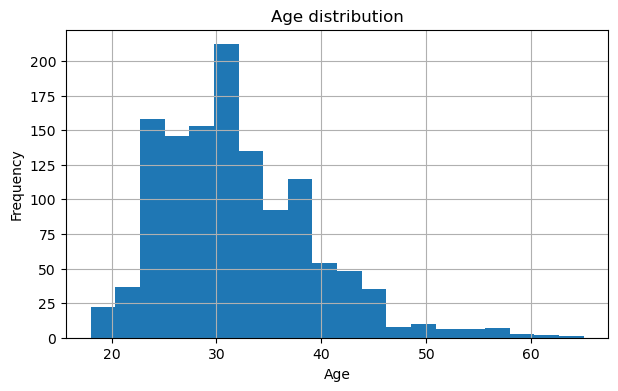

In [23]:
# Plotting a histogram of the age distribution
plt.figure(figsize=(7, 4))
mental_health['Age'].hist(grid=True, bins=20)

plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency');

<div style="border:solid green 2px; padding: 20px">
    Most of the survey participants are aged 30-32 years. There are also many respondents between the ages of 22 and 39.

## Data analysis

### What is the distribution of mental health conditions among different age groups in the tech industry?

In [24]:
mental_health['treatment'].value_counts()

Yes    631
No     619
Name: treatment, dtype: int64

In [32]:
# Create a new column for age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65']

mental_health['age_group'] = pd.cut(mental_health['Age'], bins=bins, labels=labels)

# Group by age group and mental health consequence, then count occurrences
grouped_age = mental_health.groupby(['age_group', 'treatment']).size().unstack()
grouped_age

treatment,No,Yes
age_group,,
18-25,108,102
26-35,360,341
36-45,124,153
46-55,18,24
56-65,5,8


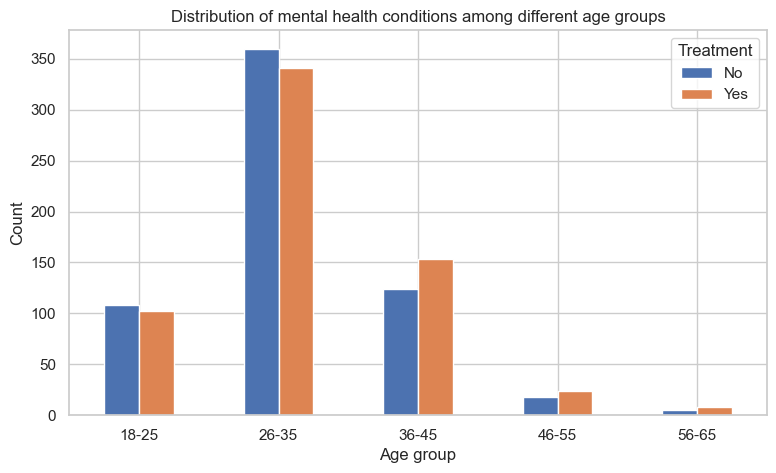

In [37]:
# Plotting a grouped bar chart
grouped_age.plot(kind='bar', stacked=False, figsize=(9, 5))

plt.title('Distribution of mental health conditions among different age groups')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(title='Treatment', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)

plt.show()

<div style="border:solid green 2px; padding: 20px">
    A total of 631 people among the respondents sought treatment for a mental disorder, 619 people did not apply. In the age groups 36-45 and 46-55, a large proportion of those who sought treatment. In other age groups, the proportions are approximately equal.

### How does the frequency of mental health issues vary by gender?

In [41]:
grouped_gender = mental_health.groupby(['Gender', 'treatment']).size().unstack()
grouped_gender

treatment,No,Yes
Gender,,
female,76,168
male,537,446
others,6,17


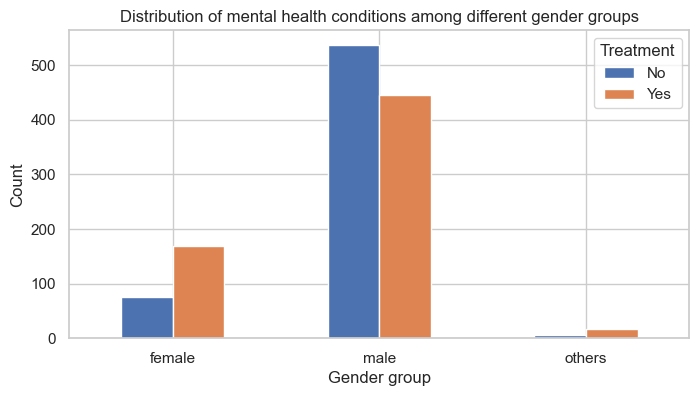

In [42]:
# Plotting a grouped bar chart
grouped_gender.plot(kind='bar', stacked=False, figsize=(8, 4))

plt.title('Distribution of mental health conditions among different gender groups')
plt.xlabel('Gender group')
plt.ylabel('Count')
plt.legend(title='Treatment', bbox_to_anchor=(1, 1))
plt.xticks(rotation=0)

plt.show()

<div style="border:solid green 2px; padding: 20px">
    Almost 2/3 of the women surveyed (168 out of 244) sought treatment for a mental disorder. More than 2/3 of the surveyed people with a different gender (17 out of 23) also sought treatment for a mental disorder. Among men, the majority of those who did not seek treatment (537 out of 983).

### Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry

In [45]:
# Create a new dataset, including only selected countries
selected_countries = ['United States', 'United Kingdom', 'Canada', 'Germany', 'Ireland', 'Netherlands', 'Australia']
filtered_countries = mental_health.query('Country in @selected_countries')
grouped_country = filtered_countries.groupby(['Country', 'treatment']).size().unstack()
grouped_country

treatment,No,Yes
Country,,
Australia,8,13
Canada,35,37
Germany,24,21
Ireland,14,13
Netherlands,18,9
United Kingdom,92,92
United States,338,407


In [49]:
# Identify the countries with the highest and lowest reported rates
country_yes_percentage = filtered_countries.groupby('Country')['treatment'].apply(lambda x: (x == 'Yes').mean())

# Determining the country with the maximum and minimum share of "yes" in the "treatment" column
max_country = country_yes_percentage.idxmax()
min_country = country_yes_percentage.idxmin()

max_percentage = country_yes_percentage.max()
min_percentage = country_yes_percentage.min()

print(f"Country with the highest level of reported mental health problems in the technology industry: {max_country} ({max_percentage:.2%})")
print(f"Country with the level of reported mental health problems in the technology industry: {min_country} ({min_percentage:.2%})")

Country with the highest level of reported mental health problems in the technology industry: Australia (61.90%)
Country with the level of reported mental health problems in the technology industry: Netherlands (33.33%)


<div style="border:solid green 2px; padding: 20px">
    The largest proportion of respondents seeking treatment for a mental disorder from the list of countries presented in the dataset is in Australia. There, 61.90% of respondents sought treatment. The lowest proportion of such respondents is in the Netherlands, where only 33.33% sought treatment for a mental disorder.